<a href="https://colab.research.google.com/github/islaarema31/PCVK/blob/main/Jobsheet_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 2

1. Agung Afrizal Daffa (2141720110)
2. Brilliyand Noval Herdana Putra (2141720104)
3. Muhammad Islahuddin (2141720268)

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung
dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import
beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini.
Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa
gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

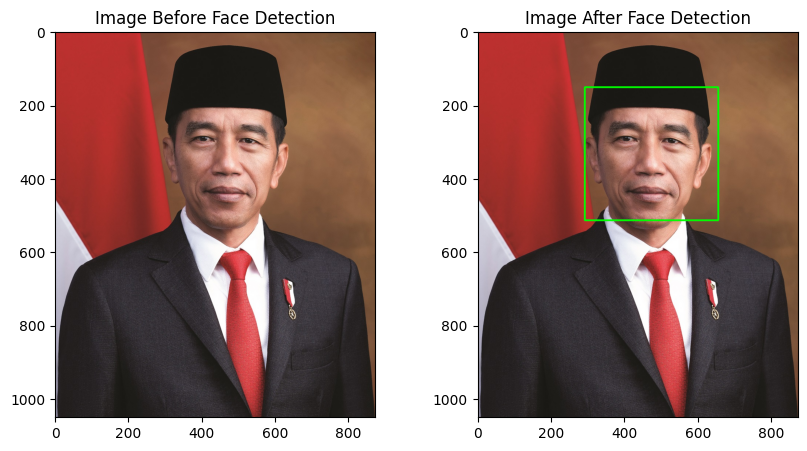

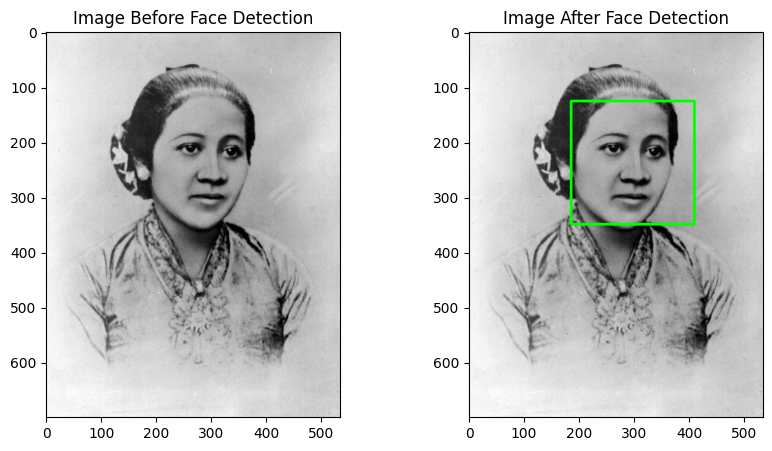

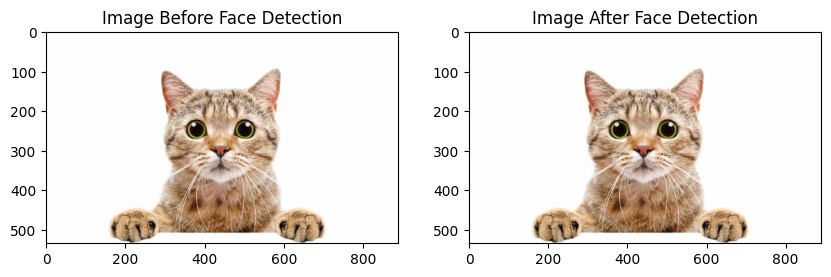

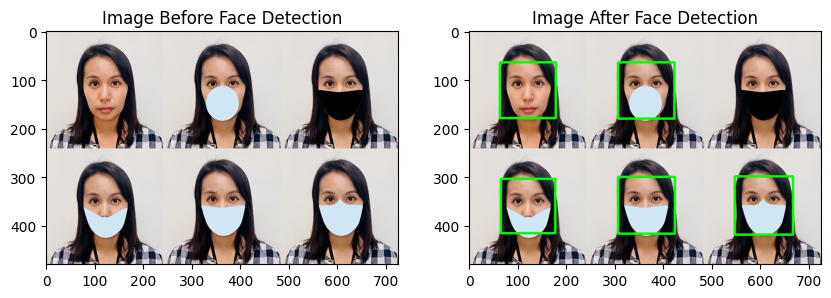

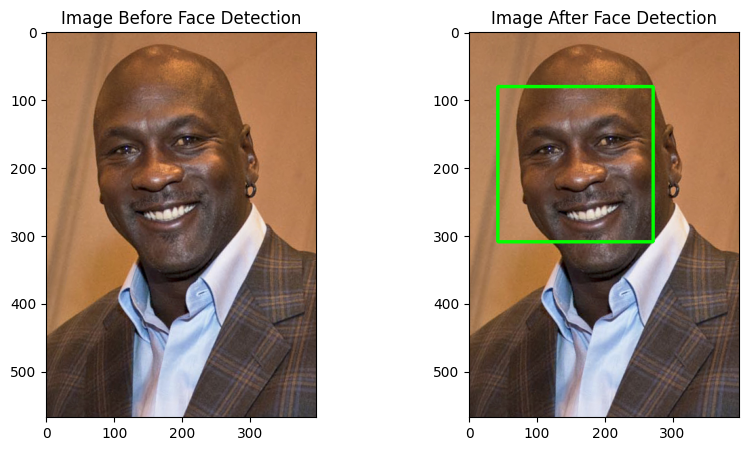

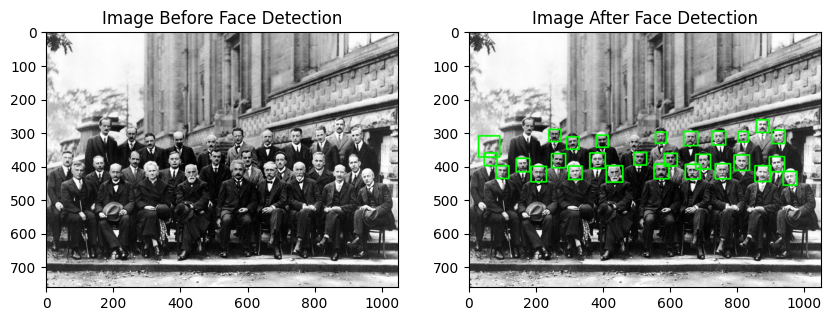

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi dan menampilkan wajah pada gambar
def detect_and_display_face(image, cascade_wajah):
    roi_wajah = cascade_wajah.detectMultiScale(image)

    for (x, y, w, h) in roi_wajah:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    return image

# Memuat klasifikasi untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalface_alt.xml')

# Memuat gambar dari jalur
image_paths = [
    '/content/drive/MyDrive/Halokes/facedet/jokowi.jpg',
    '/content/drive/MyDrive/Halokes/facedet/kartini.jpg',
    '/content/drive/MyDrive/Halokes/facedet/kucing.jpg',
    '/content/drive/MyDrive/Halokes/facedet/mask.png',
    '/content/drive/MyDrive/Halokes/facedet/mjordan.jpg',
    '/content/drive/MyDrive/Halokes/facedet/solvayconf.jpg',
]

for image_path in image_paths:
    image = cv.imread(image_path)
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title("Image Before Face Detection")

    result = detect_and_display_face(image, cascade_wajah)

    plt.subplot(122)
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    plt.title("Image After Face Detection")

    plt.show()


3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing
hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika
memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

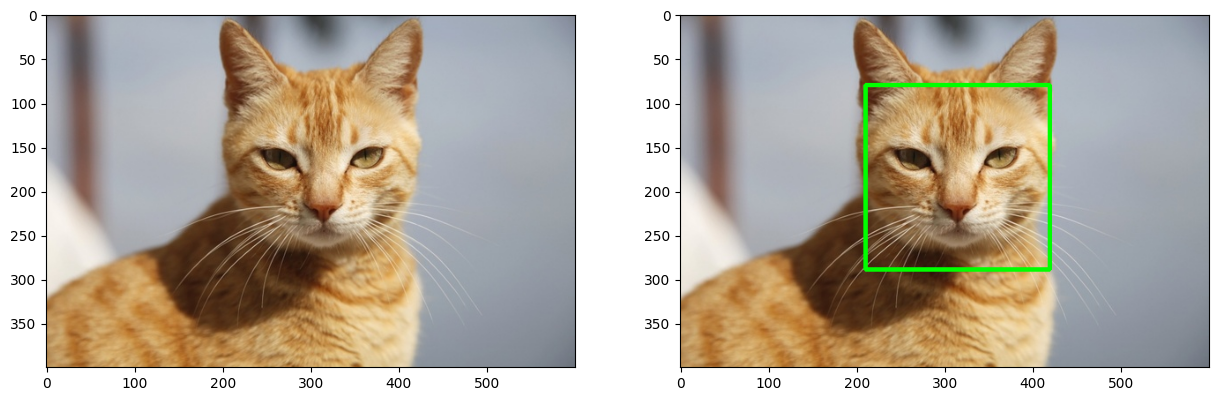

In [8]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv.imread('/content/drive/MyDrive/Halokes/facedet/mycat.jpg')
kucing1 = cv.imread('/content/drive/MyDrive/Halokes/facedet/mycat.jpg')

roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x, y, w, h) in roi_wajah:
  cv.rectangle(kucing1, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize=(10, 10))

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(kucing1, cv.COLOR_BGR2RGB))
plt.show()

4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar
seperti berikut.

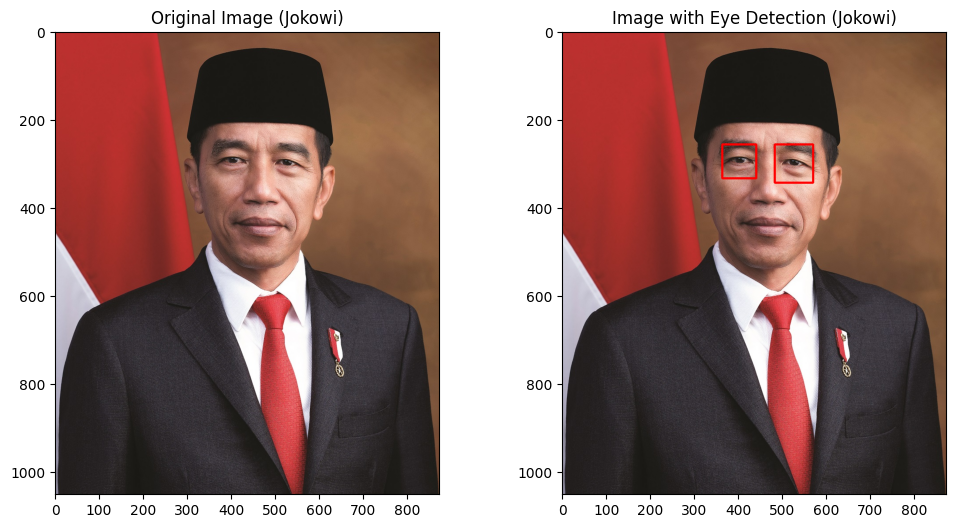

In [34]:
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi wajah manusia, lalu mata dalam wajah
def detect_and_highlight_eyes_in_face(image, cascade_face, cascade_eyes):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah manusia
    faces = cascade_face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Mendeteksi wajah manusia
        face_roi = image[y:y+h, x:x+w]
        eyes = cascade_eyes.detectMultiScale(face_roi, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (ex, ey, ew, eh) in eyes:
            # Mendeteksi mata dalam wajah
            cv2.rectangle(face_roi, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 3)

    return image

# Memuat klasifikasi untuk deteksi wajah manusia
cascade_face = cv2.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalface_default.xml')

# Memuat klasifikasi untuk deteksi mata
cascade_eyes = cv2.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_eye.xml')

# Memuat gambar dari jalur
jokowi = cv2.imread('/content/drive/MyDrive/Halokes/facedet/jokowi.jpg')

# Clone gambar asli untuk ditampilkan bersamaan dengan hasil
original_jokowi = jokowi.copy()

# Deteksi dan sorot mata pada gambar wajah Jokowi
result = detect_and_highlight_eyes_in_face(jokowi, cascade_face, cascade_eyes)

# Tampilkan gambar sebelum dan setelah deteksi mata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_jokowi, cv2.COLOR_BGR2RGB))
plt.title("Original Image (Jokowi)")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Image with Eye Detection (Jokowi)")

plt.show()


5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses
kamera dan FaceDetection pada google colab dapat dilihat di link berikut:
https://www.youtube.com/watch?v=YiWh7QvVH60

<IPython.core.display.Javascript object>

(480, 640)
Saved to zalna.jpg


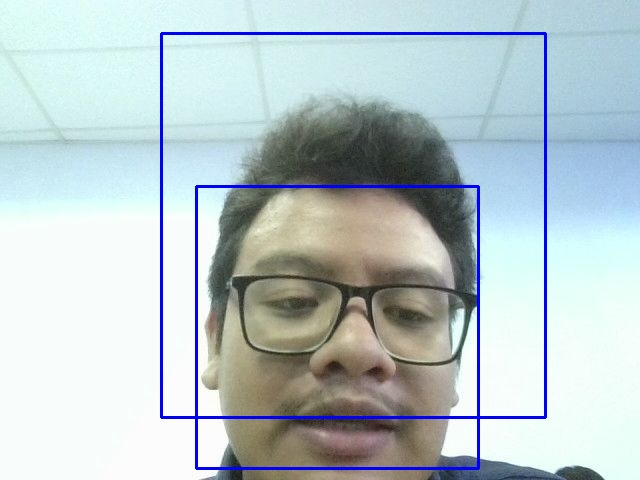

<IPython.core.display.Javascript object>

In [33]:
# Nomor 5 (Face Tracking or Face Reveal with webcam)

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalface_default.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('zalna.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah tersebut
dengan gambar “smile.png”. Berikut contoh keluarannya.

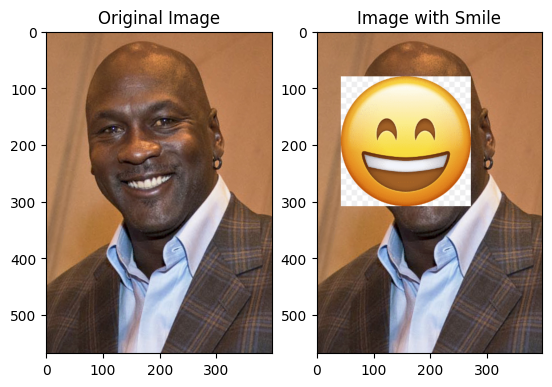

In [38]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalface_alt.xml')
mjordan = cv2.imread('/content/drive/MyDrive/Halokes/facedet/mjordan.jpg')
smile = cv2.imread('/content/drive/MyDrive/Halokes/facedet/smile.png')

mjordan_gray = cv2.cvtColor(mjordan, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(mjordan_gray)
original_mjordan = mjordan.copy()

if len(faces) > 0:
    x, y, w, h = faces[0]
    smile_resized = cv2.resize(smile, (w, h))
    roi = mjordan[y:y+h, x:x+w]
    mjordan[y:y+h, x:x+w] = cv2.addWeighted(roi, 0, smile_resized, 1, 0)

plt.subplot(121), plt.imshow(cv2.cvtColor(original_mjordan, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(mjordan, cv2.COLOR_BGR2RGB))
plt.title('Image with Smile')

plt.show()

7. Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata
menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box
berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut
contoh keluarannya.

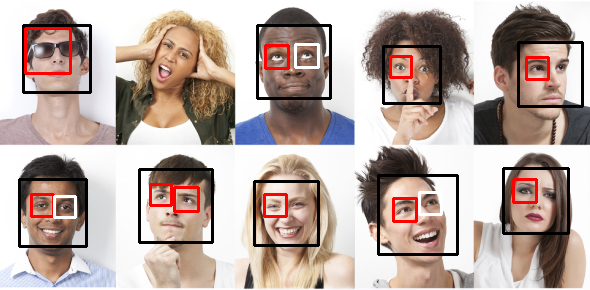

In [40]:
import cv2
from google.colab.patches import cv2_imshow

# Memuat klasifikasi untuk deteksi wajah dan mata
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Halokes/haarcascades/haarcascade_eye.xml')

# Memuat gambar "people.jpg"
image = cv2.imread('/content/drive/MyDrive/Halokes/facedet/people.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah manusia
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop melalui setiap wajah yang terdeteksi
for (x, y, w, h) in faces:
    # Gambar bounding box wajah (hitam)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Deteksi mata dalam wajah
    eyes = eye_cascade.detectMultiScale(roi_gray)

    left_eye_detected = False

    # Loop melalui setiap mata yang terdeteksi
    for (ex, ey, ew, eh) in eyes:
        # Tentukan warna bounding box berdasarkan posisi mata
        color = (0, 0, 255)  # Default: merah (mata kiri)

        if ex > w / 2:
            color = (255, 255, 255)  # Mata kanan

        # Gambar bounding box mata
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), color, 2)

        # Jika mata kiri terdeteksi, setel left_eye_detected menjadi True
        if color == (0, 0, 255):
            left_eye_detected = True

    # Jika mata kiri tidak terdeteksi, tandai sebagai mata kiri (merah)
    if not left_eye_detected:
        cv2.putText(roi_color, 'Mata Kiri', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Tampilkan hasil
cv2_imshow(image)
